In [ ]:
#Importacion de librerias.
from google.colab import files
import os
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np


# Análisis de nulos
import missingno as msno

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


import re
import io

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Ruta a tu carpeta TFM
ruta_tfm = '/content/drive/MyDrive/TFM/'

# Listar archivos en la carpeta

archivos = os.listdir(ruta_tfm)
print(archivos)

['life_expectancy.csv', 'public_healthcare_spending_share_gdp.csv', 'global_vaccination_coverage.csv', 'poverty_explorer.csv', 'annual_number_of_deaths_by_cause.csv', 'homicide_rate_unodc.csv', 'death_rate_from_suicides_gho.csv', 'gdp_per_capita_penn_world_table.csv']


In [ ]:
# Cargar cada archivo en su dataframe correspondiente
df_life_exp = pd.read_csv(ruta_tfm + 'life_expectancy.csv')
df_spending = pd.read_csv(ruta_tfm + 'public_healthcare_spending_share_gdp.csv')
df_global_vac = pd.read_csv(ruta_tfm + 'global_vaccination_coverage.csv')
df_poverty = pd.read_csv(ruta_tfm + 'poverty_explorer.csv')
df_deaths_cause = pd.read_csv(ruta_tfm + 'annual_number_of_deaths_by_cause.csv')
df_homicide = pd.read_csv(ruta_tfm + 'homicide_rate_unodc.csv')
df_death_rate = pd.read_csv(ruta_tfm + 'death_rate_from_suicides_gho.csv')
df_gdp_percapita = pd.read_csv(ruta_tfm + 'gdp_per_capita_penn_world_table.csv')


In [ ]:
df_global_vac.head(5)

,Entity,Code,Year,BCG (% of one-year-olds immunized),HepB3 (% of one-year-olds immunized),Hib3 (% of one-year-olds immunized),IPV1 (% of one-year-olds immunized),MCV1 (% of one-year-olds immunized),PCV3 (% of one-year-olds immunized),Pol3 (% of one-year-olds immunized),RCV1 (% of one-year-olds immunized),RotaC (% of one-year-olds immunized),YFV (% of one-year-olds immunized),DTP3 (% of one-year-olds immunized)
0,Afghanistan,AFG,1982,10.0,NaN,NaN,NaN,8.0,NaN,5.0,NaN,NaN,NaN,5.0
1,Afghanistan,AFG,1983,10.0,NaN,NaN,NaN,9.0,NaN,5.0,NaN,NaN,NaN,5.0
2,Afghanistan,AFG,1984,11.0,NaN,NaN,NaN,14.0,NaN,16.0,NaN,NaN,NaN,16.0
3,Afghanistan,AFG,1985,17.0,NaN,NaN,NaN,14.0,NaN,15.0,NaN,NaN,NaN,15.0
4,Afghanistan,AFG,1986,18.0,NaN,NaN,NaN,14.0,NaN,11.0,NaN,NaN,NaN,11.0


In [ ]:
df_homicide.head(5)

,Entity,Code,Year,"Homicide rate per 100,000 population - Both sexes - All ages"
0,Afghanistan,AFG,2009,4.071527
1,Afghanistan,AFG,2010,3.487093
2,Afghanistan,AFG,2011,4.208668
3,Afghanistan,AFG,2012,6.393913
4,Afghanistan,AFG,2015,9.975262


In [ ]:
df_life_exp.head(5)

,Entity,Code,Year,Period life expectancy at birth - Sex: all - Age: 0
0,Afghanistan,AFG,1950,27.7275
1,Afghanistan,AFG,1951,27.9634
2,Afghanistan,AFG,1952,28.4456
3,Afghanistan,AFG,1953,28.9304
4,Afghanistan,AFG,1954,29.2258


In [ ]:
df_spending.head(5)

,Entity,Code,Year,Domestic general government health expenditure (% of GDP)
0,Afghanistan,AFG,2002,0.084181
1,Afghanistan,AFG,2003,0.650963
2,Afghanistan,AFG,2004,0.542926
3,Afghanistan,AFG,2005,0.529184
4,Afghanistan,AFG,2006,0.497840


In [ ]:
df_death_rate.head(5)

,Entity,Code,Year,Age-standardized suicide rate - Sex: both sexes
0,Afghanistan,AFG,2000,7.71
1,Afghanistan,AFG,2001,7.89
2,Afghanistan,AFG,2002,7.85
3,Afghanistan,AFG,2003,7.72
4,Afghanistan,AFG,2004,7.77


In [ ]:
df_gdp_percapita.head(5)

,Entity,Code,Year,"GDP per capita (output, multiple price benchmarks)"
0,Albania,ALB,1971,3159.8088
1,Albania,ALB,1972,3214.6665
2,Albania,ALB,1973,3267.8481
3,Albania,ALB,1974,3330.0708
4,Albania,ALB,1975,3385.2730


In [ ]:
df_deaths_cause.head(5)

,Entity,Code,Year,Deaths - Meningitis - Sex: Both - Age: All Ages (Number),Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number),Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number),Deaths - Malaria - Sex: Both - Age: All Ages (Number),Deaths - Drowning - Sex: Both - Age: All Ages (Number),Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number),...,Deaths - Diabetes mellitus - Sex: Both - Age: All Ages (Number),Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number),Deaths - Poisonings - Sex: Both - Age: All Ages (Number),Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number),Deaths - Road injuries - Sex: Both - Age: All Ages (Number),Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number),Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number),Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)",Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number)
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816


In [ ]:
df_poverty.head(5)

,Country,Year,Share below $1 a day,Share below $2.15 a day,Share below $3.65 a day,Share below $6.85 a day,Share below $10 a day,Share below $20 a day,Share below $30 a day,Share below $40 a day,...,decile8_avg,decile9_avg,decile10_avg,bottom50_share,middle40_share,palma_ratio,s80_s20_ratio,p90_p10_ratio,p90_p50_ratio,p50_p10_ratio
0,Albania,1996,0.057416,0.534846,8.898443,47.879143,75.623880,98.702095,99.89742,99.951650,...,9.895717,11.820045,16.830648,31.233019,47.551407,0.928335,3.945872,3.566505,1.888392,1.888647
1,Albania,2002,0.046371,1.092647,11.388324,52.090965,76.705050,96.528860,98.94813,99.762024,...,9.717249,12.101596,20.623796,28.586811,45.977550,1.215056,4.831625,3.995204,2.092198,1.909572
2,Albania,2005,0.000000,0.591086,7.289305,40.428430,68.453090,95.405670,98.85736,99.546940,...,11.115035,13.596755,22.311052,29.289268,46.369564,1.142718,4.662236,3.874336,1.979621,1.957110
3,Albania,2008,0.000000,0.199925,3.902613,33.431850,62.768870,94.582830,98.50923,99.344450,...,11.974607,14.590684,24.551666,29.854542,45.687150,1.114657,4.395911,3.574216,1.957677,1.825743
4,Albania,2012,0.024101,0.620691,4.805442,36.667750,65.062386,95.520160,99.07353,99.742485,...,11.699819,14.170336,21.827140,30.110823,46.954838,1.041193,4.272574,3.630154,1.942752,1.868563


## Se estableció el periodo 2000-2019 para todas las fuentes de datos, garantizando consistencia temporal en el análisis.

In [ ]:
# Período de análisis
START_YEAR = 2000
END_YEAR = 2019

# Filtrar esperanza de vida
df_life_exp_f = df_life_exp[
    (df_life_exp['Year'] >= START_YEAR) &
    (df_life_exp['Year'] <= END_YEAR) &
    (df_life_exp['Code'].str.len() == 3)
].copy()

# Filtrar PIB
df_gdp_percapita_f = df_gdp_percapita[
    (df_gdp_percapita['Year'] >= START_YEAR) &
    (df_gdp_percapita['Year'] <= END_YEAR) &
    (df_gdp_percapita['Code'].str.len() == 3)
].copy()

# Filtrar gasto en salud
df_spending_f = df_spending[
    (df_spending['Year'] >= START_YEAR) &
    (df_spending['Year'] <= END_YEAR) &
    (df_spending['Code'].str.len() == 3)
].copy()

# Filtrar vacunación
df_global_vac_f = df_global_vac[
    (df_global_vac['Year'] >= START_YEAR) &
    (df_global_vac['Year'] <= END_YEAR) &
    (df_global_vac['Code'].str.len() == 3)
].copy()

# Filtrar homicidios
df_homicide_f = df_homicide[
    (df_homicide['Year'] >= START_YEAR) &
    (df_homicide['Year'] <= END_YEAR) &
    (df_homicide['Code'].str.len() == 3)
].copy()

# Filtrar suicidios
df_death_rate_f = df_death_rate[
    (df_death_rate['Year'] >= START_YEAR) &
    (df_death_rate['Year'] <= END_YEAR) &
    (df_death_rate['Code'].str.len() == 3)
].copy()

# Filtrar pobreza
df_poverty_f = df_poverty[
    (df_poverty['Year'] >= START_YEAR) &
    (df_poverty['Year'] <= END_YEAR)
].copy()


In [ ]:
# Renombrar esperanza de vida
df_life_exp_f = df_life_exp_f.rename(columns={
    'Period life expectancy at birth - Sex: all - Age: 0': 'life_expectancy'
})

# Renombrar PIB
df_gdp_percapita_f = df_gdp_percapita_f.rename(columns={
    'GDP per capita (output, multiple price benchmarks)': 'gdp_per_capita'
})

# Renombrar gasto en salud
df_spending_f = df_spending_f.rename(columns={
    'Domestic general government health expenditure (% of GDP)': 'health_expenditure'
})

# Renombrar vacunación
df_global_vac_f = df_global_vac_f.rename(columns={
    'DTP3 (% of one-year-olds immunized)': 'vaccination_dtp3',
    'MCV1 (% of one-year-olds immunized)': 'vaccination_mcv1'
})

# Renombrar homicidios
df_homicide_f = df_homicide_f.rename(columns={
    'Homicide rate per 100,000 population - Both sexes - All ages': 'homicide_rate'
})

# Renombrar suicidios
df_death_rate_f = df_death_rate_f.rename(columns={
    'Age-standardized suicide rate - Sex: both sexes': 'suicide_rate'
})

# Renombrar pobreza
df_poverty_f = df_poverty_f.rename(columns={
    'Country': 'Entity',
    'Share below $2.15 a day': 'poverty_215',
    'Share below $6.85 a day': 'poverty_685'
})


## Unimos los dataframes

In [ ]:
# Base: esperanza de vida
merged = df_life_exp_f[['Entity', 'Code', 'Year', 'life_expectancy']].copy()

# Unir PIB
merged = merged.merge(
    df_gdp_percapita_f[['Entity', 'Year', 'gdp_per_capita']],
    on=['Entity', 'Year'], how='left'
)

# Unir gasto en salud
merged = merged.merge(
    df_spending_f[['Entity', 'Year', 'health_expenditure']],
    on=['Entity', 'Year'], how='left'
)

# Unir vacunación
merged = merged.merge(
    df_global_vac_f[['Entity', 'Year', 'vaccination_dtp3', 'vaccination_mcv1']],
    on=['Entity', 'Year'], how='left'
)

# Unir homicidios
merged = merged.merge(
    df_homicide_f[['Entity', 'Year', 'homicide_rate']],
    on=['Entity', 'Year'], how='left'
)

# Unir suicidios
merged = merged.merge(
    df_death_rate_f[['Entity', 'Year', 'suicide_rate']],
    on=['Entity', 'Year'], how='left'
)

# Unir pobreza
merged = merged.merge(
    df_poverty_f[['Entity', 'Year', 'poverty_215', 'poverty_685']],
    on=['Entity', 'Year'], how='left'
)

## Analisis de correlacion

In [ ]:
merged.head(5)

,Entity,Code,Year,life_expectancy,gdp_per_capita,health_expenditure,vaccination_dtp3,vaccination_mcv1,homicide_rate,suicide_rate,poverty_215,poverty_685
0,Afghanistan,AFG,2000,55.2978,NaN,NaN,24.0,27.0,NaN,7.71,NaN,NaN
1,Afghanistan,AFG,2001,55.7981,NaN,NaN,33.0,37.0,NaN,7.89,NaN,NaN
2,Afghanistan,AFG,2002,56.4538,NaN,0.084181,36.0,35.0,NaN,7.85,NaN,NaN
3,Afghanistan,AFG,2003,57.3445,NaN,0.650963,41.0,39.0,NaN,7.72,NaN,NaN
4,Afghanistan,AFG,2004,57.9436,NaN,0.542926,50.0,48.0,NaN,7.77,NaN,NaN


In [ ]:
# Calcular correlaciones
numeric_cols = merged.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('Year')

corr_with_life = merged[numeric_cols].corr()['life_expectancy'].sort_values(ascending=False)

# Mostrar resultados
print("="*70)
print(" CORRELACIONES CON ESPERANZA DE VIDA")
print("="*70)
print(f"\n{'Variable':<30} {'r':>10} {'r²':>10} {'Fuerza':>15}")
print("-"*70)

for var, r in corr_with_life.items():
    if var != 'life_expectancy':
        r2 = r ** 2
        strength = ("🔴 Muy Fuerte" if abs(r) > 0.7 else
                   "🟡 Fuerte" if abs(r) > 0.5 else
                   "🟠 Moderada" if abs(r) > 0.3 else "🟢 Débil")
        print(f"{var:<30} {r:>10.3f} {r2:>10.3f} {strength:>15}")


 CORRELACIONES CON ESPERANZA DE VIDA

Variable                                r         r²          Fuerza
----------------------------------------------------------------------
gdp_per_capita                      0.623      0.388        🟡 Fuerte
vaccination_dtp3                    0.622      0.387        🟡 Fuerte
vaccination_mcv1                    0.619      0.383        🟡 Fuerte
health_expenditure                  0.508      0.258        🟡 Fuerte
homicide_rate                      -0.223      0.050         🟢 Débil
suicide_rate                       -0.379      0.144      🟠 Moderada
poverty_215                        -0.757      0.573    🔴 Muy Fuerte
poverty_685                        -0.842      0.709    🔴 Muy Fuerte




Generando visualizaciones...

✓ Gráfico guardado: correlaciones_esperanza_vida.png


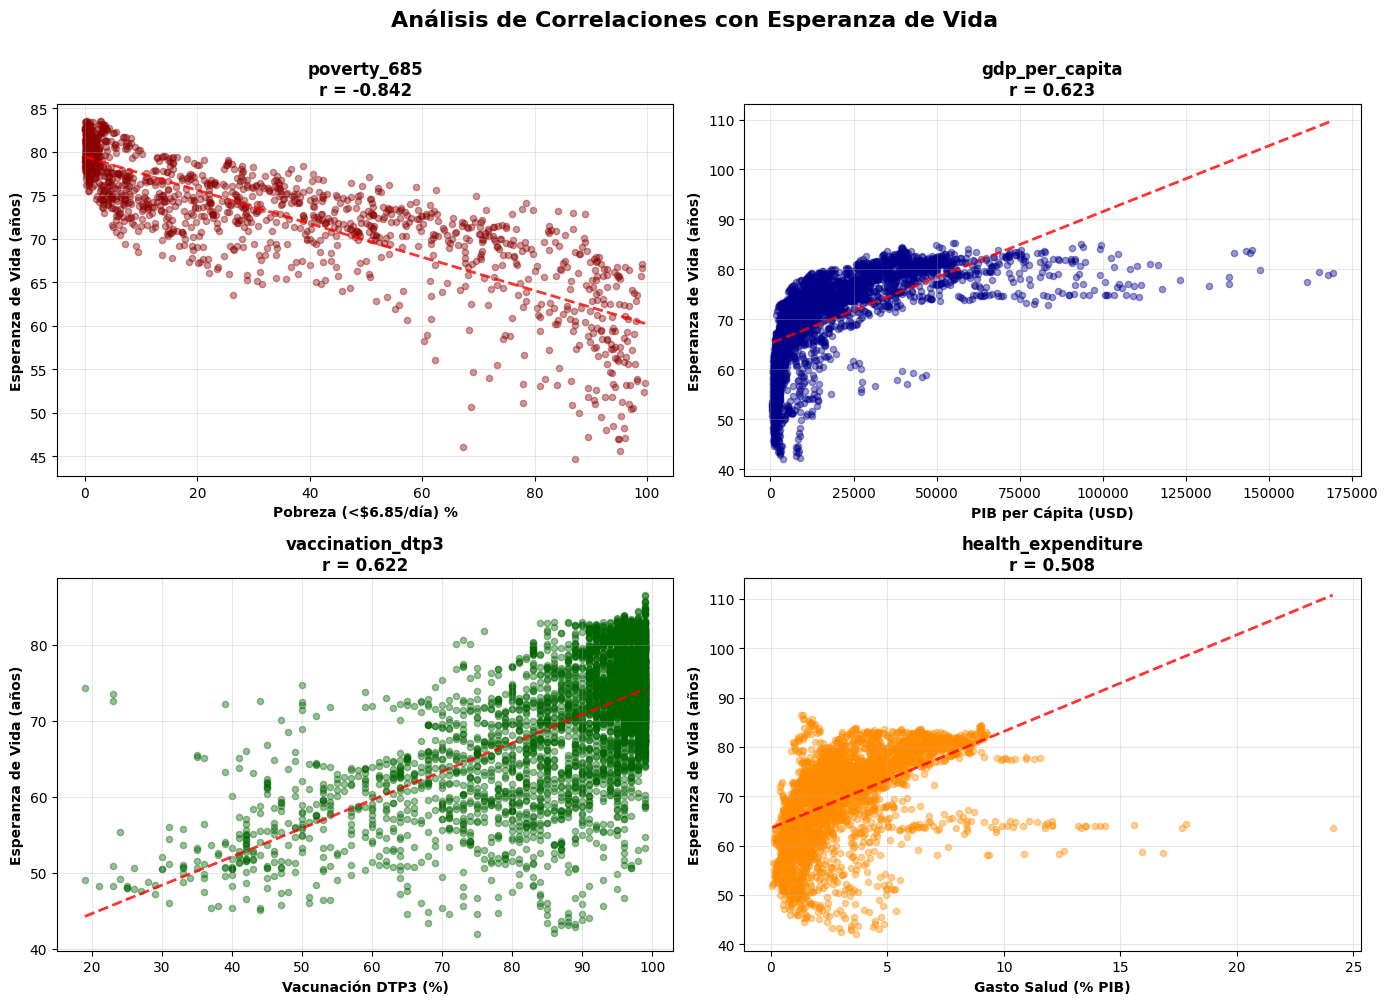


Generando heatmap...

✓ Heatmap guardado: heatmap_correlaciones.png


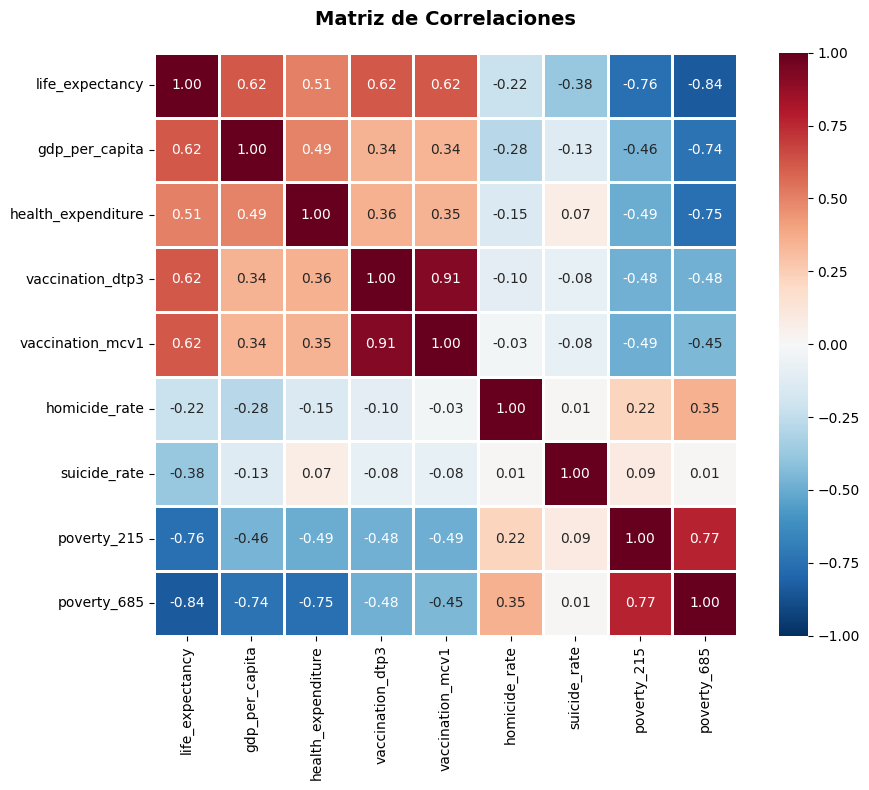

In [ ]:
print("\n\nGenerando visualizaciones...\n")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Análisis de Correlaciones con Esperanza de Vida',
             fontsize=16, fontweight='bold', y=1.00)

# Variables a graficar
plot_vars = [
    ('poverty_685', 'Pobreza (<$6.85/día) %', 'darkred'),
    ('gdp_per_capita', 'PIB per Cápita (USD)', 'darkblue'),
    ('vaccination_dtp3', 'Vacunación DTP3 (%)', 'darkgreen'),
    ('health_expenditure', 'Gasto Salud (% PIB)', 'darkorange')
]

for idx, (var, label, color) in enumerate(plot_vars):
    ax = axes[idx // 2, idx % 2]

    # Datos válidos
    data = merged[[var, 'life_expectancy']].dropna()

    if len(data) > 0:
        # Scatter
        ax.scatter(data[var], data['life_expectancy'],
                  alpha=0.4, s=20, color=color)

        # Línea de tendencia
        z = np.polyfit(data[var], data['life_expectancy'], 1)
        p = np.poly1d(z)
        x_line = np.linspace(data[var].min(), data[var].max(), 100)
        ax.plot(x_line, p(x_line), 'r--', linewidth=2, alpha=0.8)

        # Etiquetas
        ax.set_xlabel(label, fontweight='bold')
        ax.set_ylabel('Esperanza de Vida (años)', fontweight='bold')
        ax.set_title(f'{var}\nr = {corr_with_life[var]:.3f}', fontweight='bold')
        ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('correlaciones_esperanza_vida.png', dpi=300, bbox_inches='tight')
print("✓ Gráfico guardado: correlaciones_esperanza_vida.png")
plt.show()

# Heatmap
print("\nGenerando heatmap...\n")

plt.figure(figsize=(10, 8))
main_vars = ['life_expectancy', 'gdp_per_capita', 'health_expenditure',
             'vaccination_dtp3', 'vaccination_mcv1', 'homicide_rate',
             'suicide_rate', 'poverty_215', 'poverty_685']
main_vars = [v for v in main_vars if v in merged.columns]

sns.heatmap(merged[main_vars].corr(), annot=True, fmt='.2f',
            cmap='RdBu_r', center=0, vmin=-1, vmax=1,
            square=True, linewidths=1)
plt.title('Matriz de Correlaciones', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('heatmap_correlaciones.png', dpi=300, bbox_inches='tight')
print("✓ Heatmap guardado: heatmap_correlaciones.png")
plt.show()


## Modelo de prediccion.

In [ ]:
# librerias Scikit-learn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline

#Vamos a utlizar los siguientes algoritmos
#	1.	Linear = Baseline (obligatorio)
#	2.	Ridge/Lasso = Arregla multicolinealidad (tus variables están correlacionadas)
#	3.	Random Forest = Captura no linealidad (tu problema NO es lineal) ✅
#	4.	Gradient Boosting = Máxima precisión posible

In [ ]:
#Dividir los datos de prubea y entrenamiento por años
print("\n[1/6] Dividiendo datos por año...")

# Train: 2000-2017 (18 años)
train_data = merged[merged['Year'] <= 2017].copy()

# Test: 2018-2019 (2 años)
test_data = merged[merged['Year'].isin([2018, 2019])].copy()

print(f"\n✓ Train set (2000-2017):")
print(f"  - Filas: {len(train_data):,}")
print(f"  - Países únicos: {train_data['Entity'].nunique()}")
print(f"  - Años: {train_data['Year'].min()} - {train_data['Year'].max()}")

print(f"\n✓ Test set (2018-2019):")
print(f"  - Filas: {len(test_data):,}")
print(f"  - Países únicos: {test_data['Entity'].nunique()}")
print(f"  - Años: {test_data['Year'].unique()}")

# Verificar distribución temporal
print(f"\n📊 Proporción:")
print(f"  - Train: {len(train_data) / len(merged) * 100:.1f}%")
print(f"  - Test: {len(test_data) / len(merged) * 100:.1f}%")


[1/6] Dividiendo datos por año...

✓ Train set (2000-2017):
  - Filas: 4,230
  - Países únicos: 235
  - Años: 2000 - 2017

✓ Test set (2018-2019):
  - Filas: 470
  - Países únicos: 235
  - Años: [2018 2019]

📊 Proporción:
  - Train: 90.0%
  - Test: 10.0%


In [ ]:
# Seleccionar variables predictoras basadas en correlaciones
predictors = [
    'gdp_per_capita',
    'vaccination_dtp3',
    'vaccination_mcv1',
    'health_expenditure',
    'poverty_685',
    'poverty_215',
    'suicide_rate',
    'homicide_rate'
]

# Variable objetivo
target = 'life_expectancy'

# Separar X e y para train
X_train = train_data[predictors].copy()
y_train = train_data[target].copy()

# Separar X e y para test
X_test = test_data[predictors].copy()
y_test = test_data[target].copy()

print(f"\n✓ Variables preparadas:")
print(f"  X_train: {X_train.shape}")
print(f"  y_train: {y_train.shape}")
print(f"  X_test: {X_test.shape}")
print(f"  y_test: {y_test.shape}")

# Crear dataset para modelado
X = merged[predictors].copy()
y = merged[target].copy()


✓ Variables preparadas:
  X_train: (4230, 8)
  y_train: (4230,)
  X_test: (470, 8)
  y_test: (470,)


In [ ]:
#Analisis de nulos



Valores nulos por variable:
  gdp_per_capita                   1108 ( 23.57%)
  vaccination_dtp3                  819 ( 17.43%)
  vaccination_mcv1                  819 ( 17.43%)
  health_expenditure                966 ( 20.55%)
  poverty_685                      3208 ( 68.26%)
  poverty_215                      3208 ( 68.26%)
  suicide_rate                     1040 ( 22.13%)
  homicide_rate                    1960 ( 41.70%)

  life_expectancy                     0 (  0.00%)

✓ Filas con objetivo válido: 4,700


## Tratamientos de Nulos:

In [ ]:
#Opcion 1: Eliminar nulos
# Análisis de nulos en train
print("\nValores nulos en TRAIN:")
for col in predictors:
    null_count = X_train[col].isnull().sum()
    null_pct = (null_count / len(X_train) * 100)
    if null_count > 0:
        print(f"  {col:<30} {null_count:>5} ({null_pct:>5.1f}%)")

# Análisis de nulos en test
print("\nValores nulos en TEST:")
for col in predictors:
    null_count = X_test[col].isnull().sum()
    null_pct = (null_count / len(X_test) * 100)
    if null_count > 0:
        print(f"  {col:<30} {null_count:>5} ({null_pct:>5.1f}%)")

# Imputación con mediana (basada SOLO en train)
print("\n✓ Aplicando imputación con mediana...")
imputer = SimpleImputer(strategy='median')

# IMPORTANTE: fit solo en train
X_train_imputed = pd.DataFrame(
    imputer.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)

# IMPORTANTE: transform en test (usando estadísticas de train)
X_test_imputed = pd.DataFrame(
    imputer.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)

print("✓ Imputación completada")


Valores nulos en TRAIN:
  gdp_per_capita                   990 ( 23.4%)
  vaccination_dtp3                 739 ( 17.5%)
  vaccination_mcv1                 739 ( 17.5%)
  health_expenditure               869 ( 20.5%)
  poverty_685                     2894 ( 68.4%)
  poverty_215                     2894 ( 68.4%)
  suicide_rate                     936 ( 22.1%)
  homicide_rate                   1752 ( 41.4%)

Valores nulos en TEST:
  gdp_per_capita                   118 ( 25.1%)
  vaccination_dtp3                  80 ( 17.0%)
  vaccination_mcv1                  80 ( 17.0%)
  health_expenditure                97 ( 20.6%)
  poverty_685                      314 ( 66.8%)
  poverty_215                      314 ( 66.8%)
  suicide_rate                     104 ( 22.1%)
  homicide_rate                    208 ( 44.3%)

✓ Aplicando imputación con mediana...
✓ Imputación completada



## Modelacion
---



In [ ]:
# Normalizar usando StandardScaler
scaler = StandardScaler()

# IMPORTANTE: fit solo en train
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

print("✓ Variables normalizadas")
print(f"  Media train (después): ~0.00")
print(f"  Desv train (después): ~1.00")

✓ Variables normalizadas
  Media train (después): ~0.00
  Desv train (después): ~1.00


In [ ]:
# Definir modelos
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)
}

# Almacenar resultados
results = {}

print("\n" + "="*70)
print(" RESULTADOS POR MODELO")
print("="*70)

for name, model in models.items():
    print(f"\n--- {name} ---")

    # Entrenar
    model.fit(X_train_scaled, y_train)

    # Predecir en train
    y_pred_train = model.predict(X_train_scaled)
    r2_train = r2_score(y_train, y_pred_train)

    # Predecir en test
    y_pred_test = model.predict(X_test_scaled)
    r2_test = r2_score(y_test, y_pred_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mae_test = mean_absolute_error(y_test, y_pred_test)

    # Guardar resultados
    results[name] = {
        'model': model,
        'r2_train': r2_train,
        'r2_test': r2_test,
        'rmse': rmse_test,
        'mae': mae_test,
        'predictions': y_pred_test
    }

    print(f"  R² Train:  {r2_train:.4f}")
    print(f"  R² Test:   {r2_test:.4f}")
    print(f"  RMSE Test: {rmse_test:.4f} años")
    print(f"  MAE Test:  {mae_test:.4f} años")

    # Advertencia de overfitting
    if r2_train - r2_test > 0.15:
        print(f"  ⚠️ ADVERTENCIA: Posible overfitting (diferencia de {r2_train - r2_test:.3f})")


 RESULTADOS POR MODELO

--- Linear Regression ---
  R² Train:  0.6477
  R² Test:   0.5558
  RMSE Test: 4.9336 años
  MAE Test:  3.7658 años

--- Ridge ---
  R² Train:  0.6477
  R² Test:   0.5558
  RMSE Test: 4.9335 años
  MAE Test:  3.7657 años

--- Lasso ---
  R² Train:  0.6471
  R² Test:   0.5582
  RMSE Test: 4.9203 años
  MAE Test:  3.7684 años

--- Random Forest ---
  R² Train:  0.9317
  R² Test:   0.8291
  RMSE Test: 3.0601 años
  MAE Test:  2.3290 años

--- Gradient Boosting ---
  R² Train:  0.9246
  R² Test:   0.8227
  RMSE Test: 3.1170 años
  MAE Test:  2.3686 años


## Visualizaciones


✓ Gráficos guardados: modelo_temporal_2018_2019.png


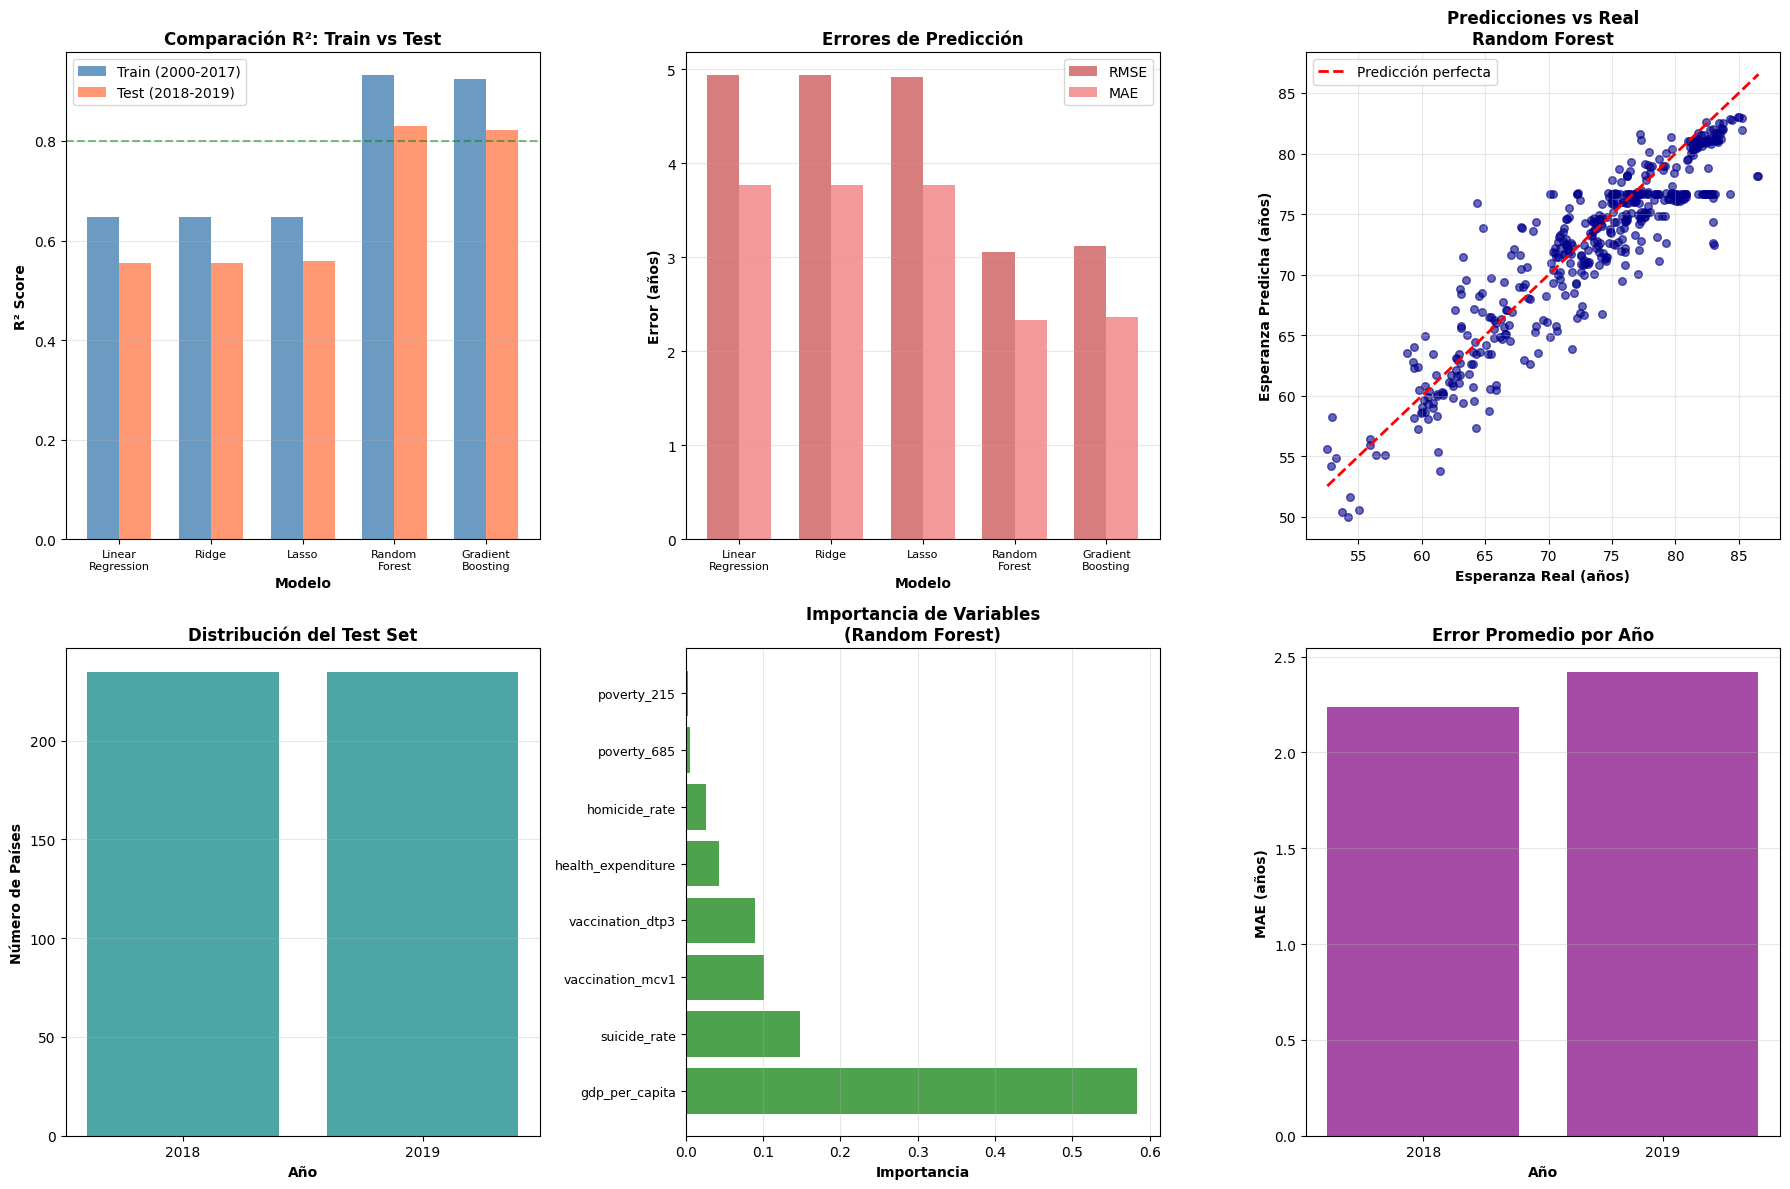

In [ ]:
fig = plt.figure(figsize=(18, 12))

# 1. Comparación de R² por modelo
plt.subplot(2, 3, 1)
model_names = list(models.keys())
r2_train_scores = [results[m]['r2_train'] for m in model_names]
r2_test_scores = [results[m]['r2_test'] for m in model_names]

x = np.arange(len(model_names))
width = 0.35

plt.bar(x - width/2, r2_train_scores, width, label='Train (2000-2017)', alpha=0.8, color='steelblue')
plt.bar(x + width/2, r2_test_scores, width, label='Test (2018-2019)', alpha=0.8, color='coral')

plt.xlabel('Modelo', fontweight='bold')
plt.ylabel('R² Score', fontweight='bold')
plt.title('Comparación R²: Train vs Test', fontsize=12, fontweight='bold')
plt.xticks(x, [m.replace(' ', '\n') for m in model_names], fontsize=8)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.axhline(y=0.8, color='green', linestyle='--', alpha=0.5, label='Umbral bueno')

# 2. RMSE y MAE
plt.subplot(2, 3, 2)
rmse_scores = [results[m]['rmse'] for m in model_names]
mae_scores = [results[m]['mae'] for m in model_names]

plt.bar(x - width/2, rmse_scores, width, label='RMSE', alpha=0.8, color='indianred')
plt.bar(x + width/2, mae_scores, width, label='MAE', alpha=0.8, color='lightcoral')

plt.xlabel('Modelo', fontweight='bold')
plt.ylabel('Error (años)', fontweight='bold')
plt.title('Errores de Predicción', fontsize=12, fontweight='bold')
plt.xticks(x, [m.replace(' ', '\n') for m in model_names], fontsize=8)
plt.legend()
plt.grid(axis='y', alpha=0.3)

# 3. Predicciones vs Real (Mejor modelo)
plt.subplot(2, 3, 3)
best_model_name = max(results.items(), key=lambda x: x[1]['r2_test'])[0]
best_predictions = results[best_model_name]['predictions']

plt.scatter(y_test, best_predictions, alpha=0.6, s=30, color='darkblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', lw=2, label='Predicción perfecta')

plt.xlabel('Esperanza Real (años)', fontweight='bold')
plt.ylabel('Esperanza Predicha (años)', fontweight='bold')
plt.title(f'Predicciones vs Real\n{best_model_name}', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

# 4. Distribución temporal del test
plt.subplot(2, 3, 4)
test_by_year = test_data.groupby('Year').size()

plt.bar(test_by_year.index, test_by_year.values, color='teal', alpha=0.7)
plt.xlabel('Año', fontweight='bold')
plt.ylabel('Número de Países', fontweight='bold')
plt.title('Distribución del Test Set', fontsize=12, fontweight='bold')
plt.xticks([2018, 2019])
plt.grid(axis='y', alpha=0.3)

# 5. Importancia de variables (Random Forest)
plt.subplot(2, 3, 5)
if 'Random Forest' in results:
    rf_model = results['Random Forest']['model']
    importances = rf_model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.barh(range(len(importances)), importances[indices], alpha=0.8, color='forestgreen')
    plt.yticks(range(len(importances)), [predictors[i] for i in indices], fontsize=9)
    plt.xlabel('Importancia', fontweight='bold')
    plt.title('Importancia de Variables\n(Random Forest)', fontsize=12, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)

# 6. Errores por año
plt.subplot(2, 3, 6)
test_data_copy = test_data.copy()
test_data_copy['prediction'] = results[best_model_name]['predictions']
test_data_copy['error'] = np.abs(test_data_copy[target] - test_data_copy['prediction'])

errors_by_year = test_data_copy.groupby('Year')['error'].mean()

plt.bar(errors_by_year.index, errors_by_year.values, color='purple', alpha=0.7)
plt.xlabel('Año', fontweight='bold')
plt.ylabel('MAE (años)', fontweight='bold')
plt.title('Error Promedio por Año', fontsize=12, fontweight='bold')
plt.xticks([2018, 2019])
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('modelo_temporal_2018_2019.png', dpi=300, bbox_inches='tight')
print("\n✓ Gráficos guardados: modelo_temporal_2018_2019.png")
plt.show()


## Resultados

In [ ]:
print("\n" + "="*70)
print(" ANÁLISIS DE RESULTADOS")
print("="*70)

# Mejor modelo
best_model_name = max(results.items(), key=lambda x: x[1]['r2_test'])[0]
best_stats = results[best_model_name]

print(f"\n🏆 MEJOR MODELO: {best_model_name}")
print(f"  R² Train:  {best_stats['r2_train']:.4f}")
print(f"  R² Test:   {best_stats['r2_test']:.4f}")
print(f"  RMSE Test: {best_stats['rmse']:.2f} años")
print(f"  MAE Test:  {best_stats['mae']:.2f} años")

# Análisis de overfitting
print("\n📊 ANÁLISIS DE OVERFITTING:")
for name, stats in results.items():
    diff = stats['r2_train'] - stats['r2_test']
    status = "✅ OK" if diff < 0.10 else "⚠️ Posible overfitting" if diff < 0.20 else "❌ Overfitting"
    print(f"  {name:<20} Δ={diff:>6.3f}  {status}")

# Predicciones por año
print("\n📅 DESEMPEÑO POR AÑO:")
test_data_analysis = test_data.copy()
test_data_analysis['prediction'] = results[best_model_name]['predictions']
test_data_analysis['error'] = np.abs(test_data_analysis[target] - test_data_analysis['prediction'])

for year in [2018, 2019]:
    year_data = test_data_analysis[test_data_analysis['Year'] == year]
    mae_year = year_data['error'].mean()
    r2_year = r2_score(year_data[target], year_data['prediction'])
    print(f"  Año {year}: MAE={mae_year:.2f} años, R²={r2_year:.4f}, n={len(year_data)} países")

# Top errores
print("\n⚠️ TOP 5 PAÍSES CON MAYOR ERROR (2018-2019):")
top_errors = test_data_analysis.nlargest(5, 'error')[['Entity', 'Year', target, 'prediction', 'error']]
for idx, row in top_errors.iterrows():
    print(f"  {row['Entity']:.<30} ({row['Year']}) Real:{row[target]:.1f} Pred:{row['prediction']:.1f} Error:{row['error']:.1f}")

# Top aciertos
print("\n✅ TOP 5 PAÍSES CON MENOR ERROR (2018-2019):")
top_success = test_data_analysis.nsmallest(5, 'error')[['Entity', 'Year', target, 'prediction', 'error']]
for idx, row in top_success.iterrows():
    print(f"  {row['Entity']:.<30} ({row['Year']}) Real:{row[target]:.1f} Pred:{row['prediction']:.1f} Error:{row['error']:.1f}")



 ANÁLISIS DE RESULTADOS

🏆 MEJOR MODELO: Random Forest
  R² Train:  0.9317
  R² Test:   0.8291
  RMSE Test: 3.06 años
  MAE Test:  2.33 años

📊 ANÁLISIS DE OVERFITTING:
  Linear Regression    Δ= 0.092  ✅ OK
  Ridge                Δ= 0.092  ✅ OK
  Lasso                Δ= 0.089  ✅ OK
  Random Forest        Δ= 0.103  ⚠️ Posible overfitting
  Gradient Boosting    Δ= 0.102  ⚠️ Posible overfitting

📅 DESEMPEÑO POR AÑO:
  Año 2018: MAE=2.24 años, R²=0.8400, n=235 países
  Año 2019: MAE=2.42 años, R²=0.8180, n=235 países

⚠️ TOP 5 PAÍSES CON MAYOR ERROR (2018-2019):
  Palau......................... (2018) Real:64.4 Pred:76.0 Error:11.6
  Andorra....................... (2019) Real:83.0 Pred:72.4 Error:10.6
  Andorra....................... (2018) Real:83.0 Pred:72.6 Error:10.4
  Palau......................... (2019) Real:64.8 Pred:73.9 Error:9.0
  San Marino.................... (2019) Real:83.0 Pred:74.4 Error:8.6

✅ TOP 5 PAÍSES CON MENOR ERROR (2018-2019):
  United States................. (20